In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import melgram
import librosa
import keras
print keras.__version__

Couldn't import dot_parser, loading of dot files will not be possible.
1.1.0


Using Theano backend.


## Load audio signal

In [19]:
SR = 12000 # sampling rate
duration = 8.0
len_src = int(SR * duration)

src, sr = librosa.load('src/bensound-cute.mp3', sr=12000, duration=8.0)  # whole signal    
src = src[:duration*SR]

n_fft = 1024
n_dft = n_fft
n_hop = 512
n_mels = 128

/Users/gnu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Compute melgram using librosa

In [20]:
D = librosa.logamplitude(librosa.feature.melspectrogram(src, 
                                                        n_fft=n_fft, 
                                                        hop_length=n_hop,
                                                        n_mels=n_mels,
                                                        fmax=6000,
                                                        sr=SR), 
                         ref_power=np.max)
print D.shape
print 'Librosa melgram dynamic range', np.max(D), np.min(D)

(128, 188)
Librosa melgram dynamic range 0.0 -80.0


## Compute melgram using keras-melspectrogram

In [21]:
src_input = src[np.newaxis, :, np.newaxis]
print 'input source for keras-melgram', src_input.shape

melgram_model = melgram.Melspectrogram(n_dft=n_fft, 
                                       input_shape=(len_src, 1), 
                                       trainable=False,
                                       n_hop=n_hop, 
                                       sr=SR,
                                       n_mels=n_mels,
                                       fmax=6000)
print melgram_model.output_shape

output = melgram_model.predict(src_input, batch_size=2)

print 'output shape', output.shape
print 'Keras-melgram dynanic range', np.max(output), np.min(output)


input source for keras-melgram (1, 96000, 1)
(None, 1, 128, 188)
output shape (1, 1, 128, 188)
Keras-melgram dynanic range 0.0 -80.0


## Plot them to compare

(128, 188)
(1, 1, 128, 188)


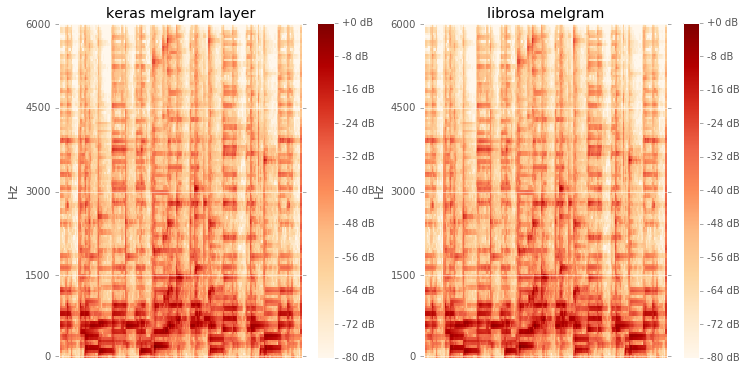

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
librosa.display.specshow(output[0, 0], y_axis='linear', sr=SR, fmax=3000, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('keras melgram layer')
plt.subplot(1,2,2)
librosa.display.specshow(D, y_axis='linear', sr=SR, fmax=3000, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('librosa melgram')

print D.shape
print output.shape

## Compare the average (over time) energy patterns

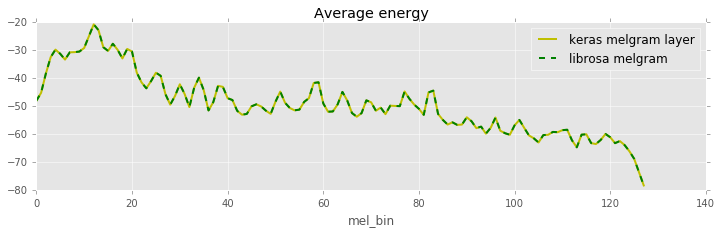

In [24]:
plt.figure(figsize=(12, 3))
plt.plot(np.mean(output[0, 0], axis=1), 'y', linewidth=2, label='keras melgram layer')
plt.plot(np.mean(D, axis=1), 'g--', linewidth=2, label='librosa melgram')
plt.xlabel('mel_bin')
plt.title('Average energy')
plt.legend()